### Specify Image Info Locations

In [95]:
from img_loader import ImageInfo

num_classes = 11

ii = ImageInfo(num_classes)
ii.set_image_dimensions([256, 256, 3])

ii.load_image_classnames('data_files/classnames.txt')
ii.load_train_image_paths('data_files/trainImNames.txt')
ii.load_test_image_paths('data_files/test1ImNames.txt')

### Load Images

In [96]:
from img_loader import ImageLoader

il = ImageLoader(ii)

il.load_all_images()
#il.subtract_image_means()

Loading train images for class "sax, saxophone" (0)...
Loading train images for class "limousine, limo" (1)...
Loading train images for class "shovel" (2)...
Loading train images for class "baseball" (3)...
Loading train images for class "meerkat, mierkat" (4)...
Loading train images for class "church, church building" (5)...
Loading train images for class "yurt" (6)...
Loading train images for class "obelisk" (7)...
Loading train images for class "bluetick (dog)" (8)...
Loading train images for class "mushroom" (9)...
Loading train images for class "ant, emmet, pismire" (10)...
Loading test images for class "sax, saxophone" (0)...
Loading test images for class "limousine, limo" (1)...
Loading test images for class "shovel" (2)...
Loading test images for class "baseball" (3)...
Loading test images for class "meerkat, mierkat" (4)...
Loading test images for class "church, church building" (5)...
Loading test images for class "yurt" (6)...
Loading test images for class "obelisk" (7)...
L

### Load `word2vec`

In [22]:
import gensim

model = gensim.models.Word2Vec.load_word2vec_format('word2vec/GoogleNews-vectors-negative300.bin', binary=True)  # C binary format

model

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
ERROR:theano.sandbox.cuda:nvcc compiler not found on $PATH. Check your nvcc installation and try again.


### Which Labels are Part of and *not* Part of `word2vec`?

In [100]:
for classname in ii.classnames:
    try:
        model[classname]
        
        print '{} is IN word2vec!'.format(classname)
    except KeyError:
        print '{} NOT in word2vec!'.format(classname)

sax, saxophone NOT in word2vec!
limousine, limo NOT in word2vec!
shovel is IN word2vec!
baseball is IN word2vec!
meerkat, mierkat NOT in word2vec!
church, church building NOT in word2vec!
yurt is IN word2vec!
obelisk is IN word2vec!
bluetick (dog) NOT in word2vec!
mushroom is IN word2vec!
ant, emmet, pismire NOT in word2vec!


### Take First Word in Each of the Labels...

In [101]:
classnames = [classname.split()[0] for classname in ii.classnames]
classnames = [classname.split(',')[0] for classname in classnames]

classnames

['sax',
 'limousine',
 'shovel',
 'baseball',
 'meerkat',
 'church',
 'yurt',
 'obelisk',
 'bluetick',
 'mushroom',
 'ant']

### Get `word2vec` Embeddings for Each Label

In [102]:
embeddings = np.array([model[classname] for classname in classnames])

embeddings.shape

(11, 300)

### Affinity Matrix

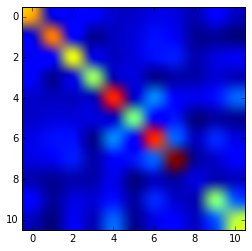

In [124]:
affinity_matrix = np.dot(embeddings, embeddings.T)

plt.imshow(affinity_matrix, interpolation='catrom')

### Which Words is Each Word Most Similar To?

In [110]:
for classname in classnames:
    print 'Words most similar to {}...'.format(classname.upper())
    print
    
    for similar_word, score in model.most_similar(classname):
        print similar_word, score
        
    print

Words most similar to SAX...

saxophone 0.842030107975
tenor_sax 0.810840785503
saxophonist 0.774514555931
alto_sax 0.763413965702
tenor_saxophone 0.754911899567
guitar 0.753402233124
trombone 0.752578020096
harmonica 0.74691337347
vibraphone 0.737318515778
baritone_sax 0.723803281784

Words most similar to LIMOUSINE...

limo 0.823372483253
limousines 0.698554873466
stretch_limo 0.653646528721
limos 0.651788949966
chauffeured 0.632141053677
chauffeur_driven 0.626999974251
chauffeur 0.618360757828
limosine 0.616405367851
chauffeured_limousine 0.599939644337
Mercedes_limousine 0.596711397171

Words most similar to SHOVEL...

shovels 0.76616358757
snowblow 0.66142308712
backhoe 0.581168651581
shoveling 0.568747639656
Wes_Velker 0.550619006157
shovels_rakes 0.549147307873
posthole_digger 0.547494292259
trowel 0.545029520988
mattock 0.544031858444
snow_blower 0.543143570423

Words most similar to BASEBALL...

Baseball 0.754246890545
softball 0.708990573883
ballplayers 0.676147460938
basketb

### Which Labels is Each Label Most Similar To?

In [117]:
for i, class_order in enumerate(np.argsort(-affinity_matrix)):
    print '{}: {}'.format(classnames[i], ','.join(np.array(classnames)[class_order[1:]]))
    print

sax: baseball,mushroom,shovel,yurt,obelisk,limousine,meerkat,church,ant,bluetick

limousine: yurt,shovel,obelisk,sax,church,meerkat,mushroom,baseball,bluetick,ant

shovel: obelisk,yurt,limousine,ant,sax,mushroom,baseball,church,meerkat,bluetick

baseball: sax,church,shovel,mushroom,ant,meerkat,bluetick,obelisk,limousine,yurt

meerkat: yurt,ant,mushroom,obelisk,bluetick,sax,shovel,church,limousine,baseball

church: obelisk,yurt,baseball,limousine,shovel,sax,meerkat,mushroom,ant,bluetick

yurt: meerkat,obelisk,mushroom,limousine,shovel,church,sax,ant,bluetick,baseball

obelisk: yurt,shovel,church,ant,meerkat,limousine,sax,mushroom,baseball,bluetick

bluetick: bluetick,ant,yurt,mushroom,sax,shovel,baseball,limousine,obelisk,church

mushroom: ant,yurt,meerkat,sax,shovel,baseball,obelisk,bluetick,church,limousine

ant: meerkat,mushroom,obelisk,shovel,yurt,bluetick,sax,baseball,church,limousine



### How Diffuse are the Similarity Scores?

Some wins:

- Animals seem to be closest to other animals
    - `meerkat` to `bluetick` and `ant`
    - `ant` to `meerkat`
- Structures most similar to other structures
    - `church` to `obelisk`
    
Some losses:

- `yurt` is most similar to `meerkat`

Axes(0.125,0.840385;0.775x0.0596154)
Axes(0.125,0.768846;0.775x0.0596154)
Axes(0.125,0.697308;0.775x0.0596154)
Axes(0.125,0.625769;0.775x0.0596154)
Axes(0.125,0.554231;0.775x0.0596154)
Axes(0.125,0.482692;0.775x0.0596154)
Axes(0.125,0.411154;0.775x0.0596154)
Axes(0.125,0.339615;0.775x0.0596154)
Axes(0.125,0.268077;0.775x0.0596154)
Axes(0.125,0.196538;0.775x0.0596154)
Axes(0.125,0.125;0.775x0.0596154)


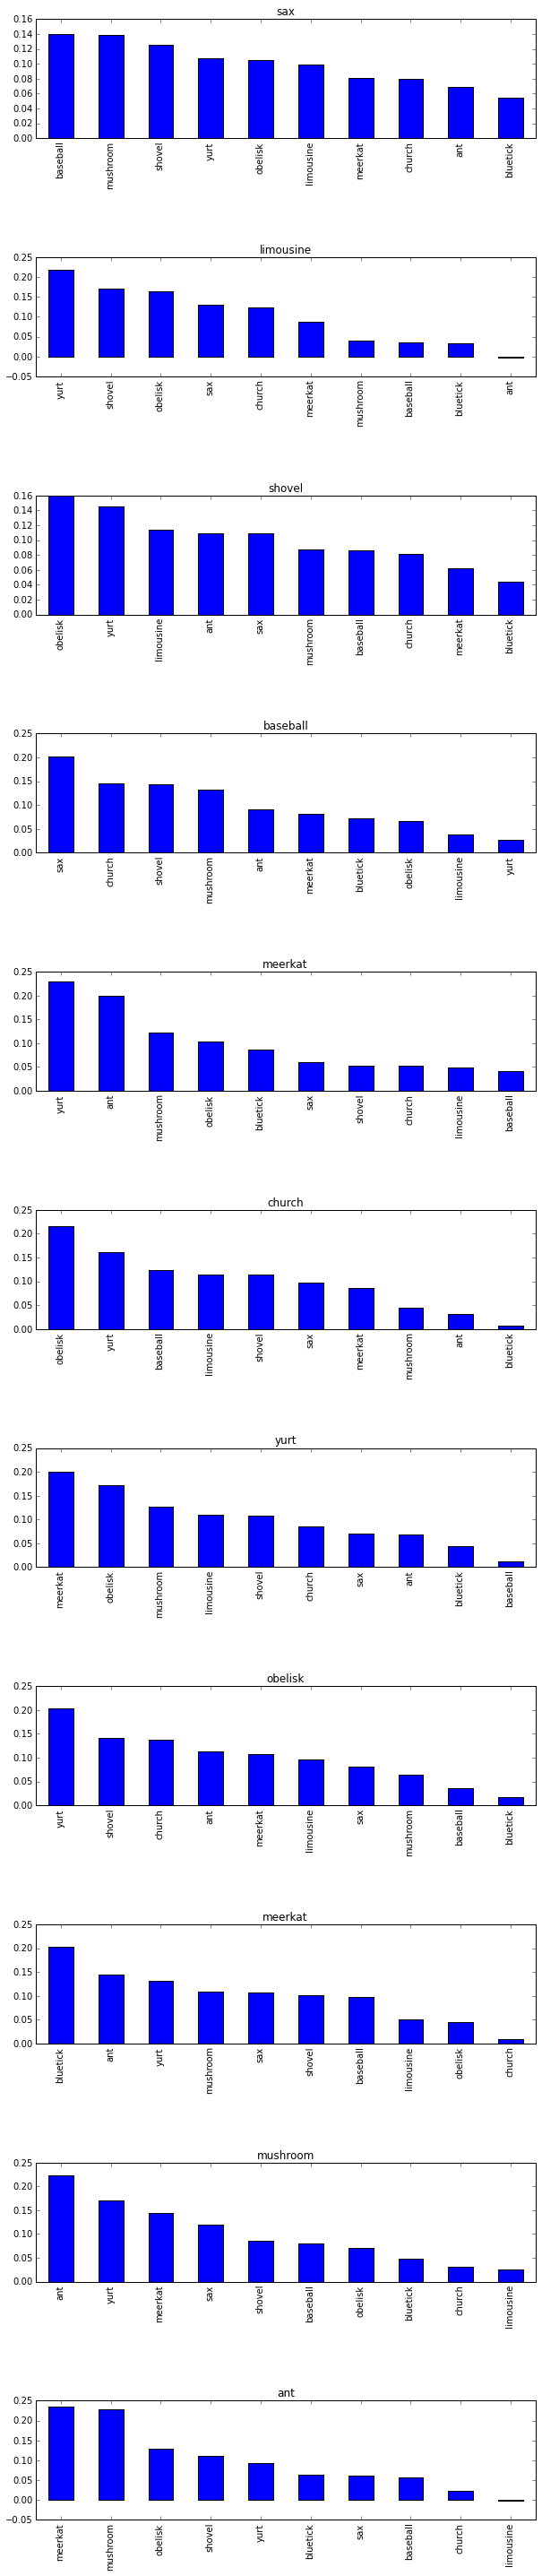

In [162]:
fig, axes_list = plt.subplots(num_classes, figsize=[10, 50])

for label_scores, label_idxs, axes in zip(np.sort(-affinity_matrix), np.argsort(-affinity_matrix), axes_list):
    label_scores = -label_scores[1:] / -label_scores[1:].sum()
    
    print pd.Series(label_scores, index=np.array(classnames)[label_idxs[1:]]).plot(kind='bar', title=classnames[label_idxs[0]], ax=axes)
    
fig.subplots_adjust(hspace=1.)